## проверка гипотез

In [112]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict


In [153]:
df = pd.read_csv("football_stat1.csv", sep=',')
display(df)

,Unnamed: 0,Владение1,Владение2,Удары по воротам1,Удары по воротам2,Удары в створ1,Удары в створ2,Удары мимо1,Удары мимо2,Фолы1,...,Угловые удары2,Штрафные удары1,Штрафные удары2,Вне игры1,Вне игры2,Команда1,Команда2,Голы1,Голы2,Результат
0,0,36,64,8,18,3,4,5,14,12,...,5,7,12,1,1,Брентфорд,Арсенал,2,0,1
1,1,49,51,13,9,8,3,5,6,11,...,4,9,10,2,3,Манчестер Юнайтед,Лидс,5,1,1
2,2,36,64,11,12,3,8,8,4,10,...,6,7,10,1,0,Бернли,Брайтон,1,2,2
3,3,61,39,11,3,6,1,5,2,15,...,2,11,14,0,1,Челси,Кристал Пэлас,3,0,1
4,4,38,62,11,8,7,2,4,6,18,...,4,13,18,0,2,Уотфорд,Астон Вилла,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1043,47,53,8,6,6,4,2,2,9,...,7,7,8,3,1,Лестер,Тоттенхэм,2,4,2
1044,1044,67,33,17,5,11,3,6,2,8,...,5,10,8,1,1,Манчестер Сити,Эвертон,5,0,1
1045,1045,43,57,10,6,3,3,7,3,11,...,9,1,11,2,1,Шеффилд Юнайтед,Бернли,1,0,1
1046,1046,37,63,13,13,7,5,6,8,5,...,3,9,5,5,2,Вест Хэм,Саутгемптон,3,0,1


#### 1-ая гипотеза:

##### H1: Матожидание числа забитых голов на домашнем стадионе статистически значимо превышает математическое ожидание забитых голов на выездном матче

###### В каждом матче для команды 1 матч - домашний, для команды 2 - выездной. 

Гипотеза:



$$
\begin{aligned}
& H_0: \mu_{home} = \mu_{guest} \\
& H_1: \mu_{home} > \mu_{guest}
\end{aligned}
$$
Уровень значимости: 5%

Сравним средние значения голов команд, для которых матч был домашним и для которых матч был выездным. 

In [154]:
mean_home = df["Голы1"].mean()
print(mean_home)
mean_guest = df["Голы2"].mean()
print(mean_guest)

1.4532442748091603
1.2938931297709924


Text(0, 0.5, 'frequency')

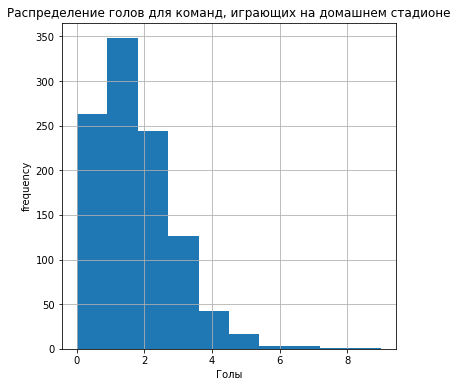

In [145]:
h1 = df["Голы1"].hist(figsize = (6,6))

h1.set_title("Распределение голов для команд, играющих на домашнем стадионе")
h1.set_xlabel("Голы")
h1.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

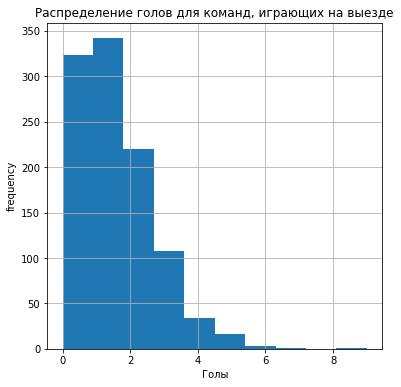

In [146]:
h2 = df["Голы2"].hist(figsize = (6,6))

h2.set_title("Распределение голов для команд, играющих на выезде")
h2.set_xlabel("Голы")
h2.set_ylabel("frequency")

Вывод: каждое из распределений похоже на нормальное

Проверим равенство дисперсий:

In [118]:
print(df["Голы1"].var())
print(df["Голы2"].var())

1.663523371027367
1.5486923744322207


Вывод: математические ожидания практически равны. 

Таким образом, можем использовать двухвыборочный t тест для независимых выборок. 

In [119]:
from scipy.stats import ttest_ind

print(ttest_ind(df["Голы1"], df["Голы2"]))

pvalue1 = ttest_ind(df["Голы1"], df["Голы2"]) [1]

if pvalue1 < 0.05:
    print("H0 отвергается. Математические ожидания голов неравны.")
else:
    print("Нет оснований отвергать H0. Математические ожидания голов равны.")

Ttest_indResult(statistic=2.8782828934139233, pvalue=0.0040390086969148715)
H0 отвергается. Математические ожидания голов неравны.


Таким образом, гипотеза о статистическом превышении математического ожидания голов команд, для которых матч является домашним над математическим ожиданием голов команд, для которых матч является выездным подтверждается. 

#### 2-ая гипотеза : 

##### H1: Количество ударов по воротам имеет большую корреляцию с количеством голов, чем количество фолов,  коррелирующих с той же величиной  (по модулю)

Объединим данные по голам1 и голам2, ударам по воротам1 и ударам по воротам2, фолам1 и фолам2. 

In [120]:
shots = df["Удары по воротам1"]+ df["Удары по воротам2"]
goals = df['Голы1'] + df['Голы2']
fouls = df['Фолы1'] + df['Фолы2']

Гипотеза: 

$$
\begin{aligned}
& H_0: | corr_{goals;shots} |  <= | corr_{goals;fouls} |\\
& H_1: | corr_{goals;shots} | > | corr_{goals;fouls} |
\end{aligned}
$$
Уровень значимости: 5%

Text(0, 0.5, 'frequency')

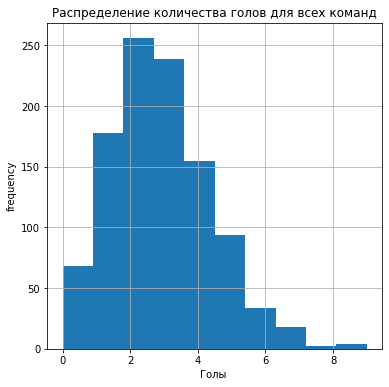

In [147]:
h3 = goals.hist(figsize = (6,6))

h3.set_title("Распределение количества голов для всех команд")
h3.set_xlabel("Голы ")
h3.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

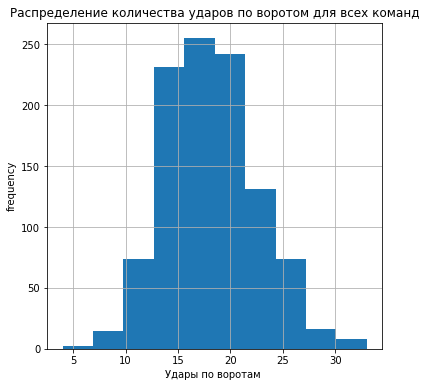

In [122]:
h4 = shots.hist(figsize = (6,6))

h4.set_title("Распределение количества ударов по воротом для всех команд")
h4.set_xlabel("Удары по воротам ")
h4.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

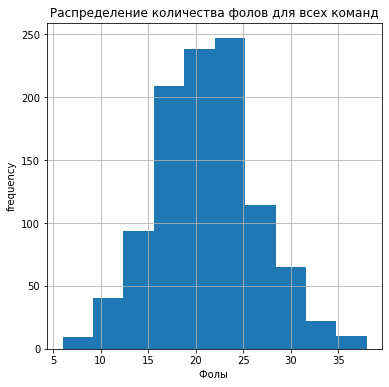

In [123]:
h5 = fouls.hist(figsize = (6,6))

h5.set_title("Распределение количества фолов для всех команд")
h5.set_xlabel("Фолы ")
h5.set_ylabel("frequency")

Вывод: каждое из распределений похоже на нормальное
    
Значит модем применить тест корреляции Пирсона как и для вычисления корреляции между голами и ударами по воротом, так и для вычисления корреляции между голами и фолами. 

In [124]:
from scipy.stats.stats import pearsonr


corr_goals_shots, pvalue_goals_shots = sts.pearsonr(goals, shots)
corr_goals_fouls, pvalue_goals_fouls = sts.pearsonr(goals, fouls)
#print(corr_goals_shots)
#print(corr_goals_fouls)


Построим доверительные интервалы для каждой из корреляций, для того чтобы сделать вывод о подтверждении гипотезы (интервалы не пересекаются) или об отверждержении гипотезы (интервалы пересекаются):

Будем использовать преобразование Фишера:

In [151]:
alpha = 0.05

n = len(goals)

se_goals_shots = 1 / np.sqrt(n - 3)

se_goals_fouls = 1 / np.sqrt(n - 3)

t_crit = sts.t.ppf(1 - alpha/2, n - 2)

CI_goals_shots = (np.tanh(np.arctanh(corr_goals_shots) - t_crit * se_goals_shots),
                  np.tanh(np.arctanh(corr_goals_shots) + t_crit * se_goals_shots))

CI_goals_fouls = (np.tanh(np.arctanh(corr_goals_fouls) - t_crit * se_goals_fouls),
                  np.tanh(np.arctanh(corr_goals_fouls) + t_crit * se_goals_fouls))

print("95% Доверительный интервал для корреляции между голами и ударами по воротам:", CI_goals_shots)
print("95% Доверительный интервал для корреляции между голами и фолами:", CI_goals_fouls)

95% Доверительный интервал для корреляции между голами и ударами по воротам: (0.27477248049780073, 0.38287137260293935)
95% Доверительный интервал для корреляции между голами и фолами: (-0.11970056949215928, 0.0011239040741464032)


Доверительные интервалы не пересекаются, значит H0 отвергается. 

Таким образом, количество ударов по воротам имеет статистически большую корреляцию с количеством голов, чем количество фолов (по модулю)

#### 3-я гипотеза

##### H1 : Чем больше владение мячом команды, матч для который является домашним, тем меньше количество угловых, исполняемых командой-противником, для которой матч является выездным

Гипотеза: 

$$
\begin{aligned}
& H_0:  corr_{possesion1; corner2}   >=  0 \\
& H_1:  corr_{possesion1; corner2}  < 0 
\end{aligned}
$$
Уровень значимости: 5%

Text(0, 0.5, 'frequency')

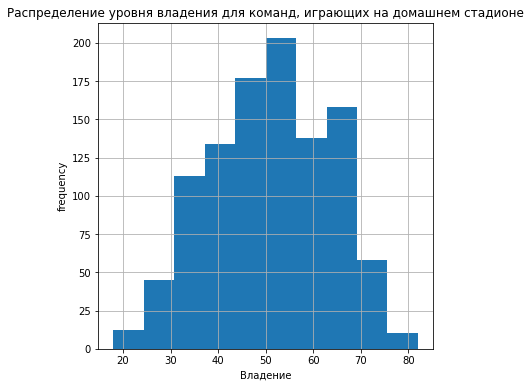

In [111]:
h6 = df["Владение1"].hist(figsize = (6,6))

h6.set_title("Распределение уровня владения для команд, играющих на домашнем стадионе")
h6.set_xlabel("Владение")
h6.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

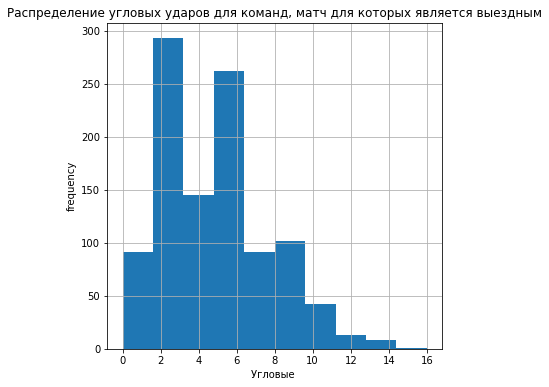

In [152]:
h7 = df["Угловые удары2"].hist(figsize = (6,6))

h7.set_title("Распределение угловых ударов для команд, матч для которых является выездным")
h7.set_xlabel("Угловые ")
h7.set_ylabel("frequency")

Вывод: каждое из распределений похоже на нормальное

Значит можем использовать тест корреляции Пирсона.

In [102]:

corr_posession1_corner2, pvalue_posession1_corner2 = sts.pearsonr(df["Владение1"], df["Угловые удары2"])
#print (pvalue_posession1_corner2)
print("корреляция:", corr_posession1_corner2)

if pvalue_posession1_corner2 < 0.05:
    print("H0 отвергается")
else:
    print("Нет оснований отвергать H0")


корреляция: -0.4606501997946045
H0 отвергается


Таким образом, существует отрицательная корреляция между владением команды1 и количеством угловых команды2. 

#### 4-я гипотеза

##### H1 : Математическое ожидание ударов по воротам больше математического ожидания ударов мимо (для команд, играющих на домашнем стадионе)

Гипотеза:
    
$$
\begin{aligned}
& H_0: \mu_{shots} = \mu_{missed} \\
& H_1: \mu_{shots} > \mu_{missed}
\end{aligned}
$$
Уровень значимости: 5%

Сравним средние значения ударов по воротам и ударов мимо:

In [144]:
mean_shots = df["Удары по воротам1"].mean()
print(mean_shots)
mean_missed = df["Удары мимо1"].mean()
print(mean_missed)

9.759541984732824
5.119274809160306


Text(0, 0.5, 'frequency')

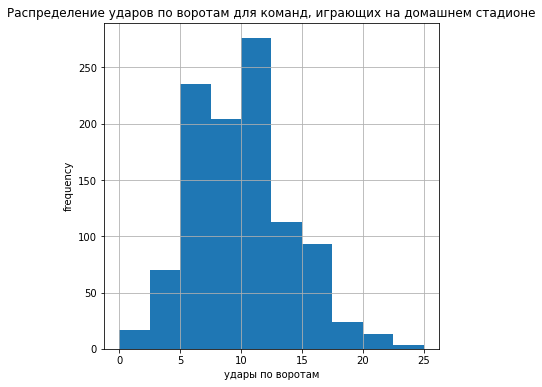

In [128]:
h8 = df["Удары по воротам1"].hist(figsize = (6,6))

h8.set_title("Распределение ударов по воротам для команд, играющих на домашнем стадионе")
h8.set_xlabel("удары по воротам")
h8.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

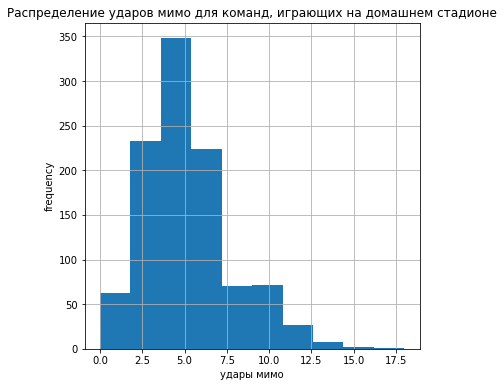

In [130]:
h8 = df["Удары мимо1"].hist(figsize = (6,6))

h8.set_title("Распределение ударов мимо для команд, играющих на домашнем стадионе")
h8.set_xlabel("удары мимо")
h8.set_ylabel("frequency")

Вывод: каждое из распределений похоже на нормальное

Можем использовать t тест для независимых выборок:

In [132]:

print(ttest_ind(df["Удары по воротам1"], df["Удары мимо1"]))

pvalue3 = ttest_ind(df["Удары по воротам1"], df["Удары мимо1"]) [1]

if pvalue3 < 0.05:
    print("H0 отвергается. Математические ожидания неравны.")
else:
    print("Нет оснований отвергать H0. Математические ожидания равны.")
    

Ttest_indResult(statistic=31.15468345454849, pvalue=2.078318574182183e-175)
H0 отвергается. Математические ожидания неравны.


Таким образом, можно сделать вывод, что математическое ожидание ударов по воротам команд, для которых стадион является домашним, превышает математическое ожидание ударов мимо для тех же ко манд. 

#### 5-я гипотеза

##### H1 : Математическое ожидание фолов среди команд, матч для которых является домашним, равно  математическому ожиданию штрафных среди команд, матч для которых происходит на выезде. 

Гипотеза:
    
$$
\begin{aligned}
& H_0: \mu_{fouls; home} \neq \mu_{forfeit; guest} \\
& H_1: \mu_{fouls; home} = \mu_{forfeit; guest}
\end{aligned}
$$
Уровень значимости: 5%

In [ ]:
Сравним средние значения Фолов1 и Штрафных ударов2:

In [136]:
mean_fouls_1 = df["Фолы1"].mean()
print(mean_fouls_1)
mean_forfeit_2 = df["Штрафные удары2"].mean()
print(mean_forfeit_2)

10.53530534351145
10.10591603053435


Text(0, 0.5, 'frequency')

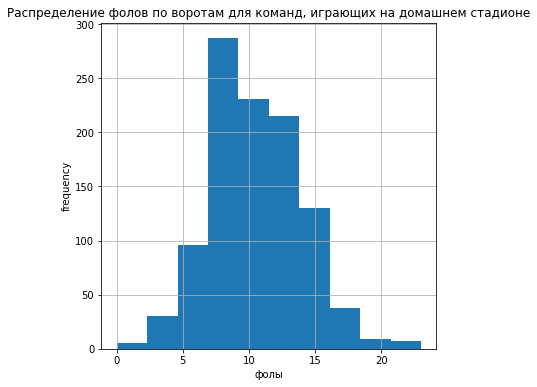

In [137]:
h9 = df["Фолы1"].hist(figsize = (6,6))

h9.set_title("Распределение фолов по воротам для команд, играющих на домашнем стадионе")
h9.set_xlabel("фолы")
h9.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

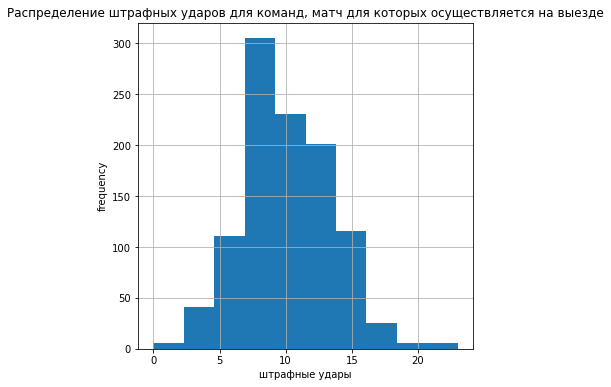

In [138]:
h10 = df["Штрафные удары2"].hist(figsize = (6,6))

h10.set_title("Распределение штрафных ударов для команд, матч для которых осуществляется на выезде")
h10.set_xlabel("штрафные удары")
h10.set_ylabel("frequency")

Вывод: каждое из распределений похоже на нормальное
    
проверим равенство дисперсий:

In [140]:
print(df["Фолы1"].var())
print(df["Штрафные удары2"].var())

12.413270011738396
11.949611576514526


Вывод: дисперсии почти равны.
    
Поскольку каждая пара (предполагаемо возникающая всегда) фола одной команды и соответсвующего штрафного другой команды независима от других пар фолов-штрафных, выборки являются независимыми. Можем использовать двухвыборочный t тест для независимых выборок. 

In [141]:
print(ttest_ind(df["Фолы1"], df["Штрафные удары2"]))

pvalue3 = ttest_ind(df["Фолы1"], df["Штрафные удары2"]) [1]

if pvalue3 < 0.05:
    print("H0 отвергается. Математические ожидания неравны.")
else:
    print("Нет оснований отвергать H0. Математические ожидания равны.")

Ttest_indResult(statistic=2.816226269635587, pvalue=0.004904666349925567)
H0 отвергается. Математические ожидания неравны.


Таким образом, можно сделать вывод, что математическое ожидания фолов команд, для которых матч - домашний, не равно математическому ожиданию штрафных команд, для которых матч - гостевой